In [36]:
#Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn.apionly as sns

#import CSV
terror = "Terrorism.csv"
df = pd.read_csv(terror, encoding = "Latin")

#Pull in columns that we need from the large data set
df2 = df[["iyear","imonth", "country_txt", "region_txt", "city", "attacktype1_txt", "targtype1_txt","success","nkill","nwound"]]

#Rename the columns for better understanding
renamed_df = df2.rename(columns={"iyear": "Year","imonth": "Month", "country_txt": "Country", 
                "region_txt":"Region", "city":"City", "attacktype1_txt": "Attack Type",
                "targtype1_txt":"Target Type","nkill":"Casualties","nwound":"Number Wounded",
                                 "success":"Successful Attack"})
renamed_df.head()

C:\Users\khyman003\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,63,79,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Month,Country,Region,City,Attack Type,Target Type,Successful Attack,Casualties,Number Wounded
0,2012,1,Pakistan,South Asia,Quetta,Bombing/Explosion,Business,1,0.0,12.0
1,2012,1,Kenya,Sub-Saharan Africa,Garissa,Armed Assault,Business,1,3.0,14.0
2,2012,1,Pakistan,South Asia,Sui,Bombing/Explosion,Military,1,4.0,3.0
3,2012,1,Kenya,Sub-Saharan Africa,Garissa,Armed Assault,Business,1,2.0,14.0
4,2012,1,Pakistan,South Asia,Peer Chhatta,Hostage Taking (Kidnapping),Private Citizens & Property,1,0.0,0.0


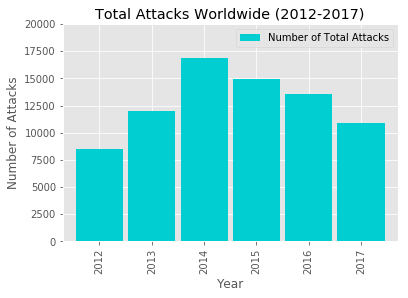

In [71]:
#Plot worldwide attacks
worldwidechart = renamed_worldwidecount.plot(kind='bar', width=.9, color = ["darkturquoise"])

worldwidechart.set_xlabel("Year")
worldwidechart.set_ylabel("Number of Attacks")
worldwidechart.set_title("Total Attacks Worldwide (2012-2017)")
plt.ylim((0,20000))

worldwidechart

In [60]:
#Group the full dataframe above by year, and count the total number of records. This will equate to the total
#number of attacks, sucessful or not.

worldwide = renamed_df.groupby(["Year"]).count()
worldwidecount = worldwide[["Country"]]
renamed_worldwidecount = worldwidecount.rename(columns={"Country":"Number of Total Attacks"})
renamed_worldwidecount.head()


#Filter the full dataframe above for only successful attacks
WWsuccess = renamed_df.loc[renamed_df["Successful Attack"] == 1, :]
WWsuccessct = WWsuccess.groupby(["Year"]).count()
WWsuccessDF = WWsuccessct[["Successful Attack"]]
WWsuccessDF_renamed= WWsuccessDF.rename(columns={"Successful Attack":"Successful Attack"})
WWsuccessDF.head()

#Filter the full dataframe above for only failed attacks
WWfail = renamed_df.loc[renamed_df["Successful Attack"] == 0, :]
WWfailct = WWfail.groupby(["Year"]).count()
WWfailDF = WWfailct[["Successful Attack"]]
WWfailDF_renamed= WWfailDF.rename(columns={"Successful Attack":"Failed Attack"})
WWfailDF.head()

#Combine the dataframes to include successful and failed attacks for easy plotting
CombinedSuccessFail = pd.merge(WWsuccessDF_renamed, WWfailDF_renamed, on="Year")
CombinedSuccessFail.head()

,Successful Attack,Failed Attack
Year,,
2012,7600,922
2013,10484,1552
2014,15015,1888
2015,12676,2289
2016,10975,2612


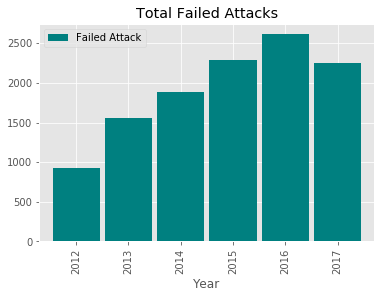

In [61]:
FailChart = WWfailDF_renamed.plot(kind="bar", title="Total Failed Attacks", width=.9, color = ["teal"])


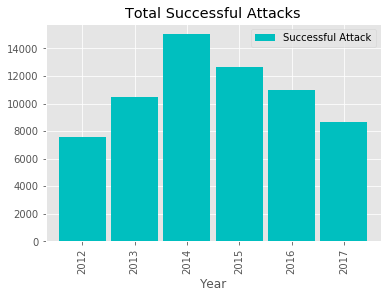

In [62]:
SucessChart = WWsuccessDF_renamed.plot(kind="bar", title="Total Successful Attacks", width=.9, color = ["c"])


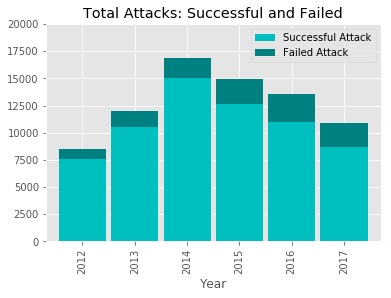

In [70]:
SuccessFailChart = CombinedSuccessFail.plot(kind="bar", stacked=True, 
                                            title="Total Attacks: Successful and Failed",
                                            width=.9, color = ["c","teal"])
plt.ylim((0,20000))
SuccessFailChart

In [73]:
#Group the dataframe by Region and Year, and get the count
terror = renamed_df.groupby(["Region"]).count()
terroryear = terror.groupby(["Year"])

In [75]:
#Create a dataframe that aggregates the count of total attacks ()

#Break up dataframes by year
FY2012DF  = renamed_df.loc[renamed_df["Year"] == "2012", :]
FY2013DF  = renamed_df.loc[renamed_df["Year"] == "2013", :]
FY2014DF  = renamed_df.loc[renamed_df["Year"] == "2014", :]
FY2015DF  = renamed_df.loc[renamed_df["Year"] == "2015", :]
FY2016DF  = renamed_df.loc[renamed_df["Year"] == "2016", :]
FY2017DF  = renamed_df.loc[renamed_df["Year"] == "2017", :]


#Group by region and count how many attacks that year
Region2012 = FY2012DF.groupby(["Region"]).count()
Region2013 = FY2013DF.groupby(["Region"]).count()
Region2014 = FY2014DF.groupby(["Region"]).count()
Region2015 = FY2015DF.groupby(["Region"]).count()
Region2016 = FY2016DF.groupby(["Region"]).count()
Region2017 = FY2017DF.groupby(["Region"]).count()


#pull out one column count to plot.
Chart2012 = Region2012[["Year"]]
Chart2013 = Region2013[["Year"]]
Chart2014 = Region2014[["Year"]]
Chart2015 = Region2015[["Year"]]
Chart2016 = Region2016[["Year"]]
Chart2017 = Region2017[["Year"]]

Combined = pd.merge(Chart2012, Chart2013, on="Region")
CombinedRename = Combined.rename(columns = {"Year_x": "2012", "Year_y": "2013"})

Combined2 = pd.merge(CombinedRename, Chart2014, on="Region")
Combined2Rename = Combined2.rename(columns = {"Year":"2014"})

Combined3 = pd.merge(Combined2Rename, Chart2015, on="Region")
Combined3Rename = Combined3.rename(columns = {"Year":"2015"})

Combined4 = pd.merge(Combined3Rename, Chart2016, on="Region")
Combined4Rename = Combined4.rename(columns = {"Year":"2016"})

Combined5 = pd.merge(Combined4Rename, Chart2017, on="Region")
Combined5Rename = Combined5.rename(columns = {"Year":"2017"})
Combined5Rename

C:\Users\khyman003\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [6]:
#Middle East Chart
MiddleEast = Combined5Rename.iloc[4,:]
Africa = Combined5Rename.iloc[9, :]

Text(0.5,1,'Middle East/North Africa: Total Attacks from 2012-2017')

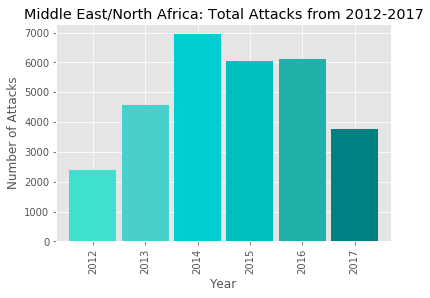

In [7]:

MEbarchart = MiddleEast.plot(kind='bar', width=.9, color = ["turquoise","mediumturquoise",
                             "darkturquoise","c","lightseagreen","teal"])

# Set the xlabel and ylabel using class methods

MEbarchart.set_xlabel("Year")
MEbarchart.set_ylabel("Number of Attacks")
MEbarchart.set_title("Middle East/North Africa: Total Attacks from 2012-2017")

#Terroism is on the decline, what could be driving that? why were attacks high in 2014? Islamic state decline?

Text(0.5,1,'Middle East & North Africa Average # of Casualties by Month (2012-2017)')

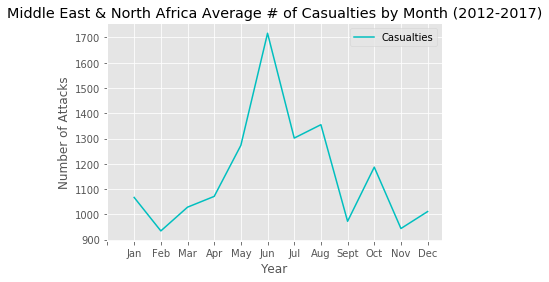

In [8]:
newdf = renamed_df[["Year","Month","Region","Casualties"]]
onlyME = newdf.loc[newdf["Region"] == "Middle East & North Africa",:]
MEbyyear = (onlyME.groupby(["Month"]).sum())/6

MElinechart2 = MEbyyear.plot(color="c")
titles = ("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec")
y_pos = np.arange(len(titles))
plt.xticks(y_pos, titles)
MElinechart2.set_xlabel("Year")
MElinechart2.set_ylabel("Number of Attacks")
MElinechart2.set_title("Middle East & North Africa Average # of Casualties by Month (2012-2017)")

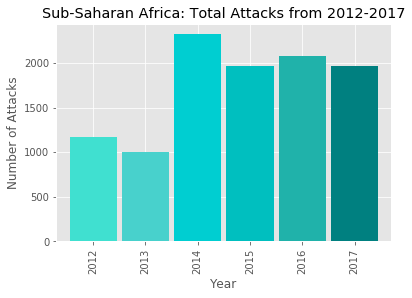

In [9]:
#Show how many incidences happened each year in Sub-Saharan Africa
africabarchart = Africa.plot(kind='bar',width=.9, color = ["turquoise","mediumturquoise",
                             "darkturquoise","c","lightseagreen","teal"])
africabarchart.set_xlabel("Year")
africabarchart.set_ylabel("Number of Attacks")
africabarchart.set_title("Sub-Saharan Africa: Total Attacks from 2012-2017")

africabarchart

In [10]:
#Get 2014 Africa data by month, show how many casualities each month.
newdf = renamed_df[["Year","Month","Region","Casualties"]]
onlyafrica = newdf.loc[newdf["Region"] == "Sub-Saharan Africa",:]


#africa2014 = onlyafrica.loc[onlyafrica["Year"] == "2014",:]
#africa2014months = africa2014.groupby("Month").sum()
#africa2014sorted = africa2014months.sort_index(ascending=1)
#africa2014sorted.T

#africalinechart = africa2014sorted.plot(figsize=(10,6), color="c", xticks=range(1, 13))
#africalinechart.set_xlabel("Month")
#africalinechart.set_ylabel("Number of Attacks")
#africalinechart.set_title("FY2014: Sub-Saharan Africa Attacks by Month")


Text(0.5,1,'Sub-Saharan Africa Average # of Casualties by Month (2012-2017)')

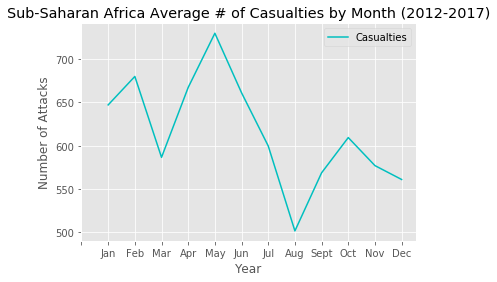

In [11]:
#Get Africa data by month, show how average number of casualities each month.

africabyyear = (onlyafrica.groupby(["Month"]).sum())/6
africabyyear.T

africalinechart2 = africabyyear.plot(color="c")
titles = ("","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec")
y_pos = np.arange(len(titles))
plt.xticks(y_pos, titles)
africalinechart2.set_xlabel("Year")
africalinechart2.set_ylabel("Number of Attacks")
africalinechart2.set_title("Sub-Saharan Africa Average # of Casualties by Month (2012-2017)")